# 🚀 Day 9 Challenge

##### 📂 Dataset: "https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows"

In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Pandas

# Q1: Load the dataset and perform the following operations:

Drop any rows with missing values.

Extract the year from the released column and add it as a new column.

Group by year and find the average IMDb rating for each year.

In [590]:
df = pd.read_csv("imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [591]:
missing_percent = df.isnull().sum()/len(df) * 100
missing_percent

Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [593]:
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

In [594]:
df['Meta_score'].skew()

-0.6052248305009935

In [595]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

In [596]:
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''))

In [597]:
df['Gross'].skew()

3.1301343288134538

In [598]:
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

In [599]:
# df['Released_Year'] = pd.to_numeric(df['Released_Year'])

In [600]:
df.loc[966, 'Released_Year']

'PG'

In [601]:
df = df[df['Released_Year'] != 'PG'].reset_index(drop=True)

In [602]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'])

In [603]:
avg_rating_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().round(3).sort_values(ascending = False).reset_index(name = 'avg_rating')
avg_rating_by_year

,Released_Year,avg_rating
0,1936,8.500
1,1921,8.300
2,1957,8.278
3,1994,8.238
4,1942,8.233
...,...,...
94,1938,7.833
95,1956,7.820
96,1943,7.800
97,1933,7.800


# Q2: Identify and replace all occurrences of a specific word (e.g., "Drama") in the genre column with another word (e.g., "Thriller").

In [605]:
df['Genre'] = df['Genre'].str.replace('Drama', 'Thriller', regex = False)
df['Genre']

0                       Thriller
1                Crime, Thriller
2        Action, Crime, Thriller
3                Crime, Thriller
4                Crime, Thriller
                 ...            
994    Comedy, Thriller, Romance
995            Thriller, Western
996       Thriller, Romance, War
997                Thriller, War
998     Crime, Mystery, Thriller
Name: Genre, Length: 999, dtype: object

# Q3: Sort the dataset based on the IMDb rating and votes in descending order and find the top 5 movies/TV shows.

In [607]:
rating_votes_sorted = df.sort_values(by = ['IMDB_Rating', 'No_of_Votes'], ascending = [False, False]).head(5)
rating_votes_sorted['Series_Title']

0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3      The Godfather: Part II
4                12 Angry Men
Name: Series_Title, dtype: object

# Visualization

## Q1: Plot a scatter plot of IMDb rating vs votes to identify any relationship between the two variables.


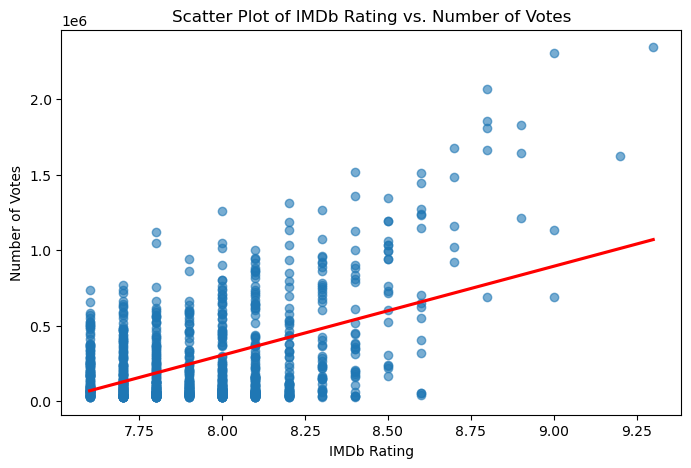

In [610]:
plt.figure(figsize = (8,5))
sns.regplot(data = df, x = 'IMDB_Rating', y = 'No_of_Votes', scatter_kws = {'alpha' : 0.6}, line_kws = {'color':'red'}, ci=None)
plt.title('Scatter Plot of IMDb Rating vs. Number of Votes')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.show()

# Q2: Create a box plot of runtime across different genres.

In [612]:
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex = False).astype(float)

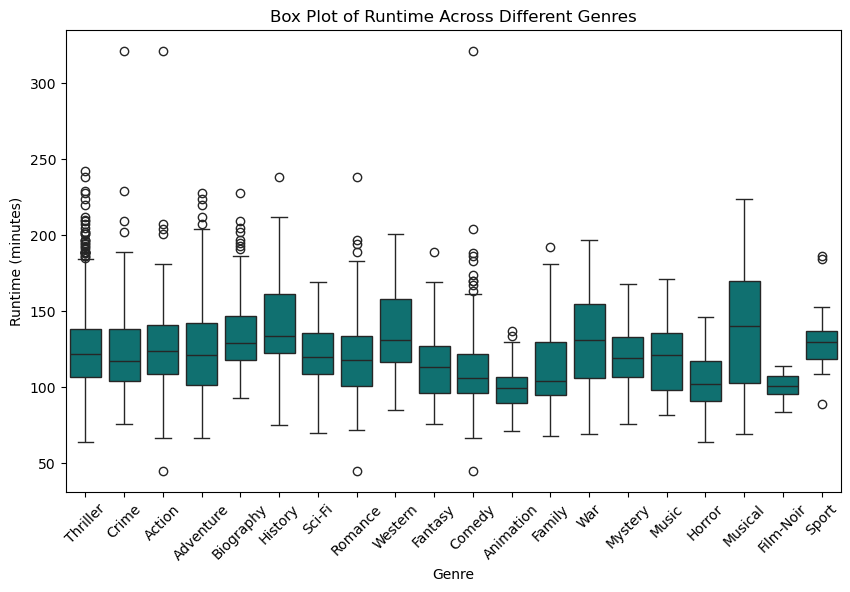

In [613]:
df['Genre'] = df['Genre'].fillna('') 
df['Genre'] = df['Genre'].astype(str)

df['Genre'] = df['Genre'].str.replace(r'[\[\]"]', '', regex=True)
df['Genre'] = df['Genre'].str.strip()
df['Genre'] = df['Genre'].str.split(', ')
df_exploded = df.explode("Genre")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_exploded, x='Genre', y='Runtime', color = 'teal')
plt.title('Box Plot of Runtime Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)
plt.show()


## Q3: Generate a heatmap to visualize the correlation between IMDb rating, runtime, and votes.



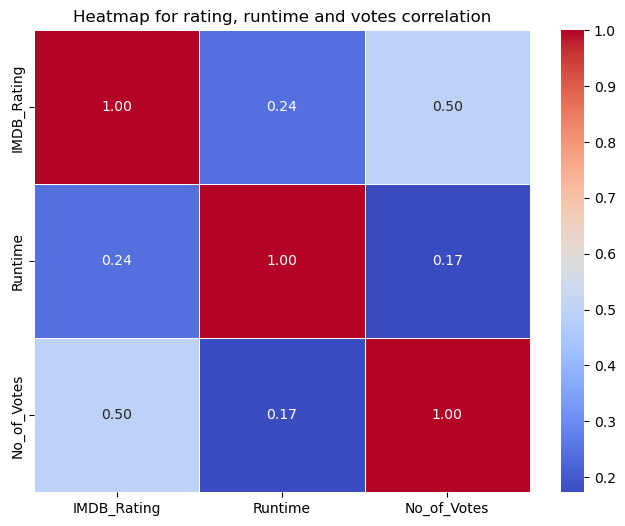

In [615]:
corr_matrix = df[['IMDB_Rating', 'Runtime', 'No_of_Votes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap for rating, runtime and votes correlation')
plt.show()


# EDA

## Q1: Conduct an outlier analysis on the IMDb rating column. Use both the IQR method and Z-score method.

In [618]:
Q1 = df['IMDB_Rating'].quantile(0.25)
Q3 = df['IMDB_Rating'].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR
outliers = (df['IMDB_Rating'] < LW) | (df['IMDB_Rating'] > UW)
print("Number of outliers:", outliers.sum())

Number of outliers: 13


In [619]:
from scipy.stats import zscore

df['z_score'] = zscore(df['IMDB_Rating'])

outliers_rating = df[df['z_score'].abs()>3]

print("Number of outliers:", len(outliers_rating))
print(outliers_rating[['IMDB_Rating', 'z_score']])

Number of outliers: 13
    IMDB_Rating   z_score
0           9.3  4.905562
1           9.2  4.542282
2           9.0  3.815720
3           9.0  3.815720
4           9.0  3.815720
5           8.9  3.452439
6           8.9  3.452439
7           8.9  3.452439
8           8.8  3.089159
9           8.8  3.089159
10          8.8  3.089159
11          8.8  3.089159
12          8.8  3.089159


## Q2: Find the top 3 genres with the highest average IMDb rating.

In [621]:
top_genres = df_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending = False).reset_index(name = 'avg_rating').head(3)
top_genres

,Genre,avg_rating
0,War,8.013725
1,Western,8.000000
2,Film-Noir,7.989474


# Statistics

## Q1: Perform a two-sample t-test comparing the average runtime of Action and Comedy movies/TV shows.

In [624]:
action_df = df_exploded[df_exploded['Genre'] == 'Action']['Runtime']
comedy_df = df_exploded[df_exploded['Genre'] == 'Comedy']['Runtime']

t_stat, p_val = stats.ttest_ind(action_df, comedy_df)

print(f"T_statistic: {t_stat:.4f}")
print(f"P_value: {p_val:.4f}")

if p_val < 0.05:
    if t_stat > 0:
        print("There is a significant difference in average runtime, with Action movies having a higher average runtime than Comedy movies/TV shows.")
    else:
        print("There is a significant difference in average runtime, with Action movies having a lower average runtime than Comedy movies/TV shows.")
else:
    print("There is no significant difference between the average runtimes of Action and Comedy movies/TV shows.")

T_statistic: 5.5959
P_value: 0.0000
There is a significant difference in average runtime, with Action movies having a higher average runtime than Comedy movies/TV shows.


## Q2: Conduct a chi-square test of independence to determine if the genre and rating category (high: >7, low: ≤7) are related.

In [626]:
df_exploded['Rating_category'] = df_exploded['IMDB_Rating'].apply(lambda x: "High" if x > 7 else "Low")

In [627]:
df_exploded['Genre'] = df_exploded['Genre'].astype(str)  
df_exploded['Rating_category'] = df_exploded['Rating_category'].astype(str) 

In [628]:
from scipy.stats import chi2_contingency

contingency_data = pd.crosstab(df_exploded['Genre'], df_exploded['Rating_category'])
print("Contingency Table:")
print(contingency_data)

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_data)

print(f"\nChi2 Stat: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequency Table:\n{expected}")

if p_val < 0.05:
    print("\nThere is a significant relationship between genre and rating category (high/low).")
else:
    print("\nThere is no significant relationship between genre and rating category.")

Contingency Table:
Rating_category  High
Genre                
Action            189
Adventure         195
Animation          82
Biography         109
Comedy            233
Crime             209
Family             56
Fantasy            66
Film-Noir          19
History            55
Horror             32
Music              35
Musical            17
Mystery            99
Romance           125
Sci-Fi             67
Sport              19
Thriller          860
War                51
Western            20

Chi2 Stat: 0.0
P-Value: 1.0
Degrees of Freedom: 0
Expected Frequency Table:
[[189.]
 [195.]
 [ 82.]
 [109.]
 [233.]
 [209.]
 [ 56.]
 [ 66.]
 [ 19.]
 [ 55.]
 [ 32.]
 [ 35.]
 [ 17.]
 [ 99.]
 [125.]
 [ 67.]
 [ 19.]
 [860.]
 [ 51.]
 [ 20.]]

There is no significant relationship between genre and rating category.
